## Relação entre `aspectos relacionados à Saúde` e `Expectativa de Vida `



In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import plotly.express as px
import numpy as np


In [67]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Period', values='Value').reset_index()

df_expectativa_vida = df_expectativa_vida.rename(columns={
    2000: '2000_expectativa',
    2010: '2010_expectativa',
    2015: '2015_expectativa',
    2019: '2019_expectativa'
})

# Selecionando apenas as colunas desejadas
df_expectativa_vida = df_expectativa_vida[['Indicator', 'ParentLocation', 'Country', 'Dim1', '2000_expectativa', '2010_expectativa', '2015_expectativa', '2019_expectativa']]
df_expectativa_vida.head()




Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
1,Life expectancy at age 60 (years),Africa,Algeria,Female,20.25,21.85,22.33,22.62
2,Life expectancy at age 60 (years),Africa,Algeria,Male,19.36,20.89,21.33,21.53
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
4,Life expectancy at age 60 (years),Africa,Angola,Female,16.01,17.54,18.42,18.55


In [68]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70


In [69]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head()


Period,Indicator,ParentLocation,Country,Dim1,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
6,Life expectancy at age 60 (years),Africa,Benin,Both sexes,16.08,16.69,17.01,17.40
9,Life expectancy at age 60 (years),Africa,Botswana,Both sexes,12.92,15.26,15.89,16.25
12,Life expectancy at age 60 (years),Africa,Burkina Faso,Both sexes,15.52,16.17,16.44,16.82


In [70]:
import pandas as pd

# Carregar o DataFrame a partir do arquivo CSV
df_tabaco = pd.read_csv('./dataset/tobacco_prevalence.csv')

# Selecionar colunas relevantes
df_tabaco = df_tabaco[['Indicator', 'ParentLocation', 'Location', 'Dim1','Period', 'Value']]

# Renomear as colunas
df_tabaco.columns = ['Indicator', 'ParentLocation', 'Country', 'Dim1', 'Year', 'Value']
df_tabaco = df_tabaco[df_tabaco['Year'].isin([2000, 2010, 2015, 2019])]

# Pivotear a coluna 'Year' para 4 colunas com os anos e seus respectivos valores
df_tabaco = df_tabaco.pivot(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Year', values='Value')

# Redefinir o índice
df_tabaco = df_tabaco.reset_index()

# Renomear as colunas
df_tabaco.columns.name = None

# Renomear as colunas dos anos
df_tabaco = df_tabaco.rename(columns={2000: '2000_tabaco', 2010: '2010_tabaco', 2015: '2015_tabaco', 2019: '2019_tabaco'})

# Visualizar o DataFrame pivoteado
df_tabaco.head()


,Indicator,ParentLocation,Country,Dim1,2000_tabaco,2010_tabaco,2015_tabaco,2019_tabaco
0,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Both sexes,16.2,15.6,15.4,15.2
1,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Female,1.7,1.0,0.8,0.6
2,Estimate of current tobacco smoking prevalence...,Africa,Algeria,Male,30.7,30.2,29.9,29.7
3,Estimate of current tobacco smoking prevalence...,Africa,Benin,Both sexes,11.0,7.2,5.8,4.9
4,Estimate of current tobacco smoking prevalence...,Africa,Benin,Female,1.9,1.5,1.3,1.2


In [71]:
# Realizar a junção dos DataFrames utilizando as colunas-chave 'Country', 'ParentLocation' e 'Dim1'
df_exp_nasc_e_tabaco = df_tabaco.merge(df_expectativa_ao_nascer, on=['Country', 'ParentLocation', 'Dim1'], how='inner')

df_exp_nasc_e_tabaco = df_exp_nasc_e_tabaco.drop(columns=['Indicator_y'])

df_exp_nasc_e_tabaco = df_exp_nasc_e_tabaco[df_exp_nasc_e_tabaco['Indicator_x'] == 'Estimate of current tobacco use prevalence (%) (age-standardized rate)']
# Visualizar o DataFrame resultante
df_exp_nasc_e_tabaco.head()



,Indicator_x,ParentLocation,Country,Dim1,2000_tabaco,2010_tabaco,2015_tabaco,2019_tabaco,2000_expectativa,2010_expectativa,2015_expectativa,2019_expectativa
1,Estimate of current tobacco use prevalence (%)...,Africa,Algeria,Both sexes,22.2,21.5,21.1,21.0,72.21,75.85,76.54,77.13
3,Estimate of current tobacco use prevalence (%)...,Africa,Benin,Both sexes,16.7,10.7,8.6,7.2,56.59,60.47,61.96,63.43
5,Estimate of current tobacco use prevalence (%)...,Africa,Botswana,Both sexes,33.2,24.8,21.7,19.8,45.59,58.14,60.93,62.25
7,Estimate of current tobacco use prevalence (%)...,Africa,Burkina Faso,Both sexes,29.8,20.5,17.0,14.9,51.64,58.59,60.92,62.70
9,Estimate of current tobacco use prevalence (%)...,Africa,Burundi,Both sexes,24.0,16.6,13.9,12.2,43.78,58.60,62.05,63.84


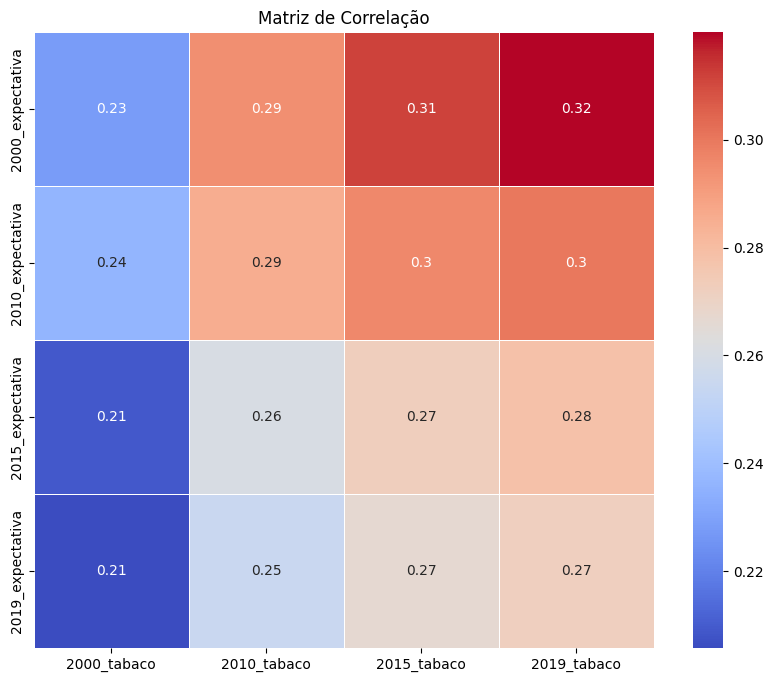

In [72]:
# Remover as colunas 'Indicator_x' e 'ParentLocation'
df_exp_nasc_e_tabaco = df_exp_nasc_e_tabaco.drop(columns=['Indicator_x', 'ParentLocation', 'Country', 'Dim1'])

# Criar a matriz de correlação
correlation_matrix = df_exp_nasc_e_tabaco.corr()

# Colunas a serem mantidas
columns_to_keep = ['2000_tabaco', '2010_tabaco', '2015_tabaco', '2019_tabaco']

# Manter apenas as colunas desejadas
correlation_matrix = correlation_matrix[columns_to_keep]

# Linhas a serem removidas
rows_to_remove = ['2000_tabaco', '2010_tabaco', '2015_tabaco', '2019_tabaco']

# Remover as linhas indesejadas
correlation_matrix = correlation_matrix.drop(rows_to_remove)



# Configurar a figura
plt.figure(figsize=(10, 8))

# Plotar um mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Definir o título do gráfico
plt.title('Matriz de Correlação')

# Mostrar o gráfico
plt.show()


c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\henri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


KeyError: 0

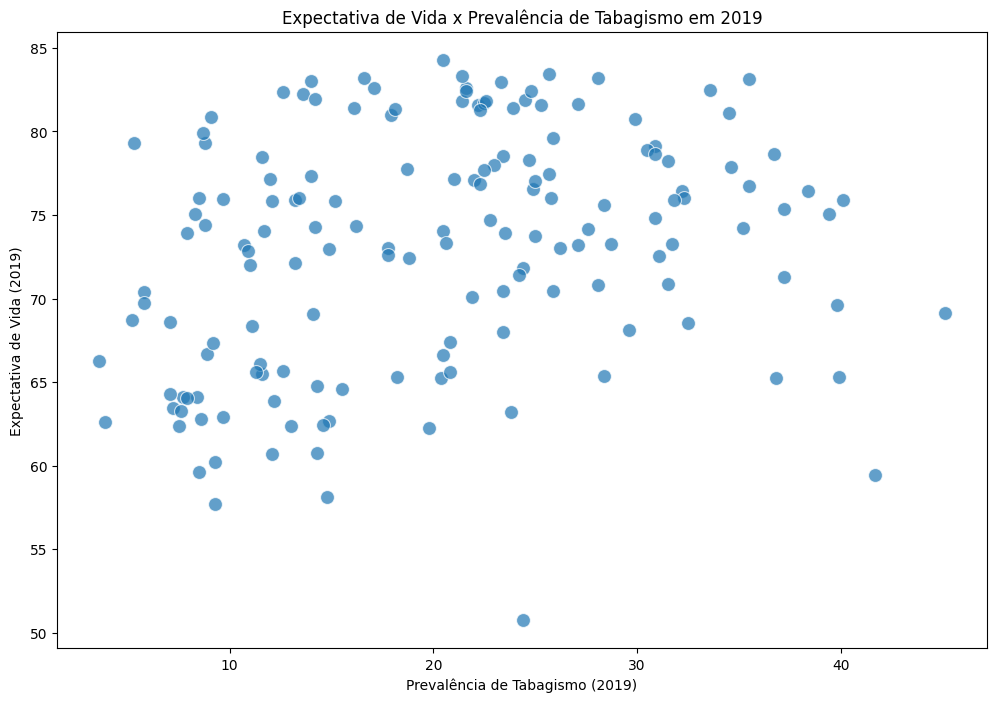

In [74]:
# Configurar a figura
plt.figure(figsize=(12, 8))

# Plotar o gráfico de dispersão com cores para representar diferentes países
scatter = sns.scatterplot(x='2019_tabaco', y='2019_expectativa', data=df_exp_nasc_e_tabaco, s=100, alpha=0.7)

# Definir o título do gráfico e rótulos dos eixos
plt.title('Expectativa de Vida x Prevalência de Tabagismo em 2019')
plt.xlabel('Prevalência de Tabagismo (2019)')
plt.ylabel('Expectativa de Vida (2019)')

# Adicionar rótulos de país para os pontos
for line in range(0,df_exp_nasc_e_tabaco.shape[0]):
     scatter.text(df_exp_nasc_e_tabaco['2019_tabaco'][line]+0.01, df_exp_nasc_e_tabaco['2019_expectativa'][line], df_exp_nasc_e_tabaco.index[line], horizontalalignment='left', size='medium', color='black')

# Mostrar o gráfico
plt.show()
